In [1]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from keras.losses import categorical_crossentropy
from keras.metrics import Precision, Recall, F1Score

from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

from keras.utils import to_categorical

from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()

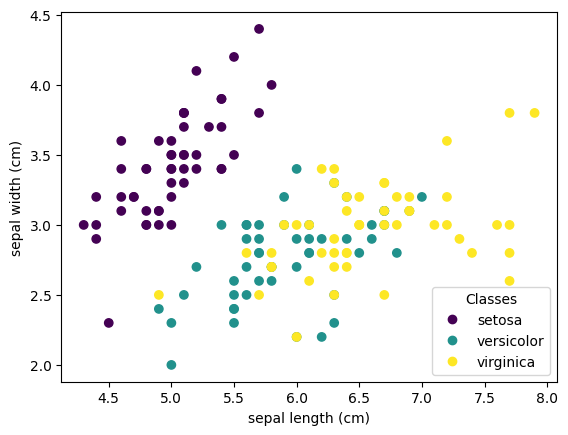

In [2]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [3]:
X = iris.data
y = iris.target

# I found that using only 2 features also outperformed when using keras and thus only used the same 2 features I used in the numpy version.
# can comment out the line below if all 4 features are needed
X = X[:, -2:]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
NUM_FEATURES = X_train.shape[1:]
print(NUM_FEATURES)
NUM_CLASSES = len(np.unique(y))
print(NUM_CLASSES)

# Define the model
sgd_model = Sequential([
        Dense(64, activation='relu', input_shape=NUM_FEATURES),
        Dense(3, activation='softmax')
    ])

sgd_optimizer = SGD(learning_rate=2.0)
sgd_model.compile(optimizer=sgd_optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = sgd_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

(2,)
3


In [5]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_probabilities = sgd_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probabilities, axis=1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Technically all of the below metrics are covered in the classification report but repeated for quick reading
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass classification
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass classification
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass classification
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


1/1 [==============================] - 0s 61ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667
Precision: 0.9700000000000001
Recall: 0.9666666666666667
F1 Score: 0.966750208855472
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


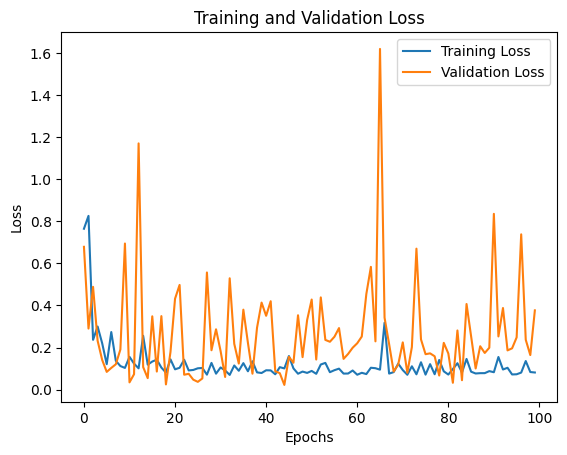

In [6]:
# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

313/313 [==============================] - 0s 1ms/step


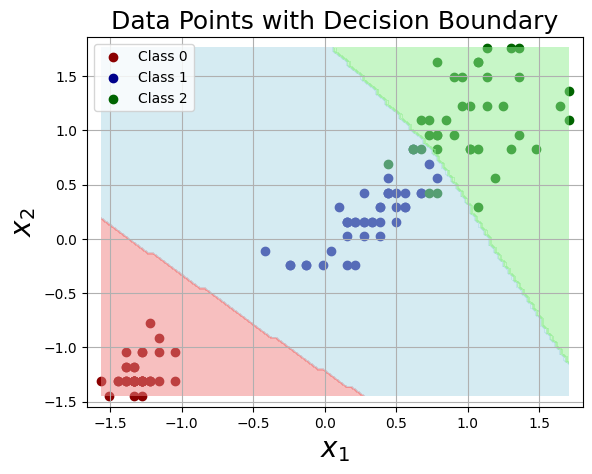

In [7]:
# Plotting function
model = sgd_model
# Function to classify data points based on decision boundaries
def classify_with_decision_boundaries(X, model):
    Z = model.predict(X)
    y_pred = np.argmax(Z, axis=1)
    return y_pred

# Classify both training and test data
y_train_pred = classify_with_decision_boundaries(X_train_scaled, model)
y_test_pred = classify_with_decision_boundaries(X_test_scaled, model)

# Create a colormap matching the colors of respective classes with more black for the points
point_colors = ['darkred', 'darkblue', 'darkgreen']
cmap_points = ListedColormap(point_colors)


# Plot decision boundaries as a faint color heatmap with the old colors
boundary_colors = ['lightcoral', 'lightblue', 'lightgreen']
cmap_boundary = ListedColormap(boundary_colors)

# Compute the minimum and maximum values of the scaled training data
x_min_scaled, x_max_scaled = X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max()
y_min_scaled, y_max_scaled = X_train_scaled[:, 1].min(), X_train_scaled[:, 1].max()

# Generate a meshgrid of points covering the same range as the scaled training data
xx_scaled, yy_scaled = np.meshgrid(np.linspace(x_min_scaled, x_max_scaled, 100),
                                   np.linspace(y_min_scaled, y_max_scaled, 100))

# Scale the meshgrid points using the same scaler
mesh_points_scaled = np.c_[xx_scaled.ravel(), yy_scaled.ravel()]
mesh_points = scaler.inverse_transform(mesh_points_scaled)

# Predict the classes for each point in the scaled meshgrid
Z = classify_with_decision_boundaries(mesh_points_scaled, model)
Z = Z.reshape(xx_scaled.shape)

# Plot each class separately
for i in range(len(np.unique(y_train))):
    plt.scatter(X_train_scaled[y_train == i, 0], X_train_scaled[y_train == i, 1], color=point_colors[i], label=f'Class {i}')

# Adjust plot limits to zoom out
plt.xlim(xx_scaled.min() - 0.1, xx_scaled.max() + 0.1)
plt.ylim(yy_scaled.min() - 0.1, yy_scaled.max() + 0.1)

# Plot decision boundary
plt.contourf(xx_scaled, yy_scaled, Z, alpha=0.5, cmap=cmap_boundary)


plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20)
plt.title('Data Points with Decision Boundary', size=18)
plt.legend()
plt.grid()
plt.show()
